In [2]:
using QuantumOptics
using SparseArrays
using Plots
using LinearAlgebra
using ProgressMeter
using Revise
using DataFrames
using Interpolations
using LaTeXStrings
includet("../Scripts/FirstBandApproximation.jl")
includet("../Scripts/ManyBody.jl")
includet("KM_Model.jl")
includet("../Scripts/Impurity.jl")
includet("../Scripts/Braiding.jl")

In [3]:
Nx = 4
Ny = 4
p = 1
q = 2
pn = 3
U = 1 # on-site interaction potential
V = 20 # Impurity potential
NPin = 2

N_Site = Nx*Ny
t = 1
NPhi0 = Int(Nx*Ny*(p/q))
PN = vcat( ( [i] for i in 0:pn) ... )
Cut_Off = NPhi0

8

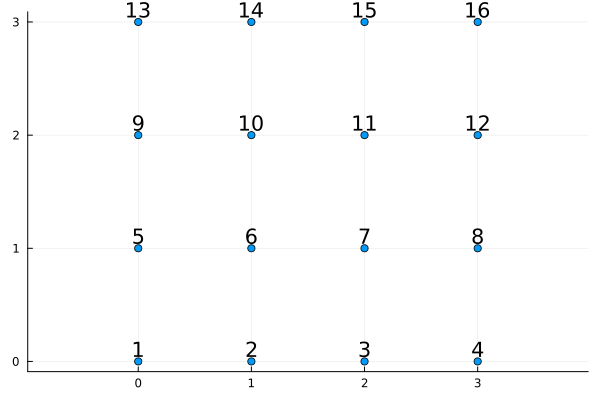

([0 0; 1 0; … ; 2 3; 3 3], nothing)

In [4]:
co, _ = plot_square_lattice(N_Site, Nx, Ny)

In [5]:
matrix = KM(Nx, Ny, t, p, q)
H = Sp_Op(N_Site, matrix)
H_sp_Sub, Sub_Basis, P, Pt = H_sub(N_Site, H, Cut_Off)
H_MB = H_Kin_MB(Sub_Basis, PN, H_sp_Sub)
basis_cut_mb, basis_cut_sp = get_Bosonic_MB_Basis(Cut_Off, PN)
H_Total = H_Total_Sub(PN, P, Pt, basis_cut_mb, Cut_Off, U, H_MB)

num_sub_list = get_num_sub_list(N_Site, P, Pt)
Sub_Number_MB_Operator_List = get_num_mb_op(N_Site, basis_cut_sp, num_sub_list, basis_cut_mb)
V_array = [V,V]; Imp_Site_Array = [13,7]
Impurity_Data = Impurity(V_array, Imp_Site_Array)
ParameterInfo(NPin, pn, Nx, Ny, p, q)

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


Lattice: 4x4
The Number of Flux per Unit-Cell (ϕ) = 1//2
Filling Fraction (ν) = 3//8 (The Number of Quasiholes = 2)
The Number of Flux Quanta = 6 (Delocalised Number = 0)
The Total Number of Particle = 3
The Number of State of Ground Degeneracy = 2


In [6]:
Impurity_H = Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Data);

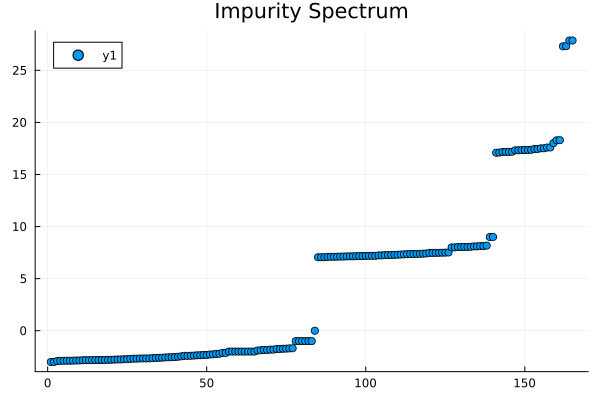

In [7]:
ϵ, λ = eigenstates(Impurity_H)
scatter(ϵ, title="Impurity Spectrum")

In [8]:
ϵ_fixed, λ_fixed =  fixed_pn_sector(pn, ϵ, λ, basis_cut_mb);

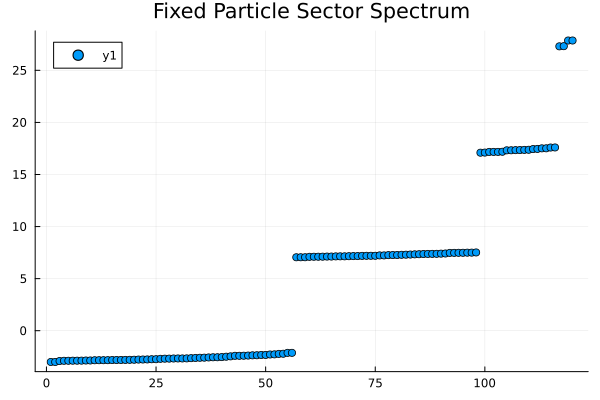

In [9]:
scatter(ϵ_fixed, title="Fixed Particle Sector Spectrum")

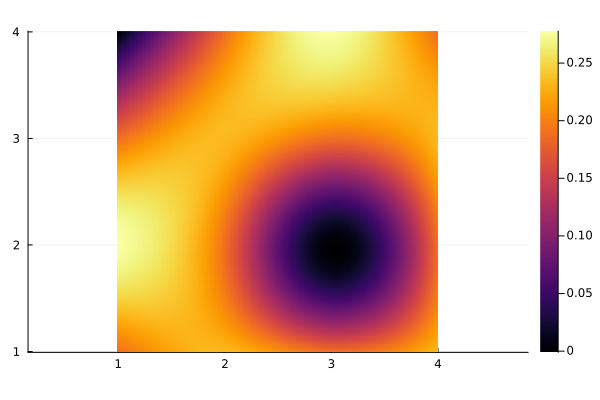

In [10]:
factor = 50
Degeneracy, _, _, _ = ground_degeneracy(Nx, Ny, p, q, NPin, pn)
plot_density(Nx, Ny, Degeneracy, N_Site, Sub_Number_MB_Operator_List, basis_cut_mb, λ_fixed, factor)

In [11]:
start_point_1 = Impurity_Data.Imp_Site[1]
lens_1 = [2, 2, 2, 2]
dirs_1 = [1,-Ny, -1, Ny]
#= lens_1 = [2, 2]
dirs_1 = [1,-Ny] =#
rec_path_1 = rectangular_path(start_point_1,lens_1,dirs_1)
#rec_path_1 = reverse(rec_path_1)

9-element Vector{Int64}:
 13
 14
 15
 11
  7
  6
  5
  9
 13

In [12]:
start_point_2 = Impurity_Data.Imp_Site[2]
lens_2 = [2, 2, 2, 2]
dirs_2 = [-1, Ny, 1, -Ny]
#= lens_2 = [2, 2]
dirs_2 = [-1, Ny] =#
rec_path_2 = rectangular_path(start_point_2,lens_2,dirs_2)
#rec_path_2 = reverse(rec_path_2)

9-element Vector{Int64}:
  7
  6
  5
  9
 13
 14
 15
 11
  7

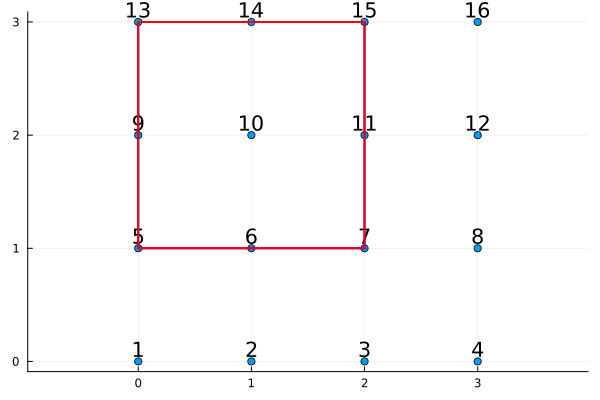

In [13]:
plot_paths(co, rec_path_1, rec_path_2)

# PATH 1

In [13]:
V1 = Impurity_Data.V0[1]
V2 = Impurity_Data.V0[2]
Imp_Site = [rec_path_1[1], rec_path_1[2], rec_path_2[1], rec_path_2[2]]
V0 = [V1, 0, V2]
Impurity_Data_0 = Impurity(V0, Imp_Site)
Impurity_H = Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Data_0);

In [29]:
ϵ0, λ0 = eigenstates(Impurity_H, Degeneracy)
ϵ0_fixed, λ0_fixed =  fixed_pn_sector(pn, ϵ0, λ0, basis_cut_mb);

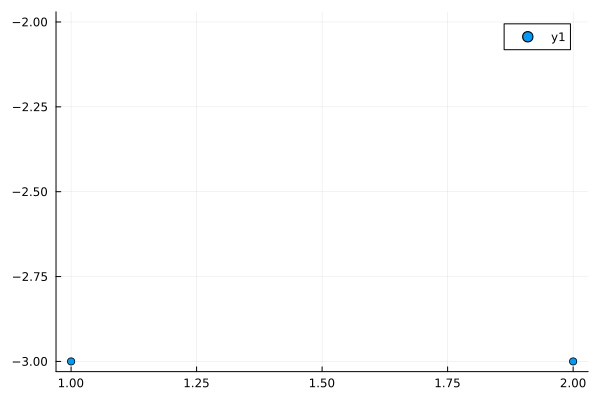

In [31]:
scatter(ϵ0[1:2])

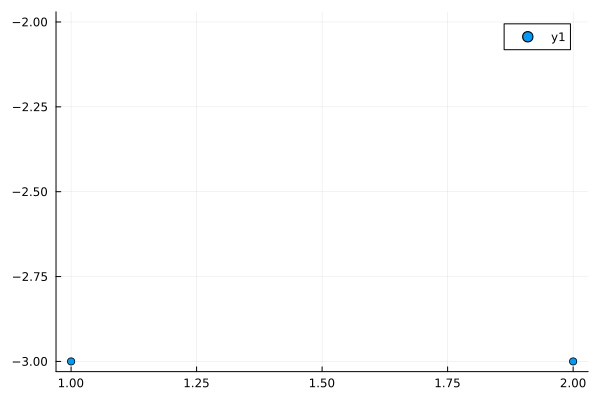

In [32]:
scatter(ϵ0_fixed)

In [33]:
Degeneracy

2

In [34]:
λ0_fixed = hcat([λ0_fixed[i].data for i in 1:Degeneracy] ...)
λ_first = copy(λ0_fixed)

165×2 Matrix{ComplexF64}:
   -0.0314179+0.0479696im      -0.0356021+0.100692im
   -0.0250722-0.0231771im      -0.0197858-0.0882498im
    0.0212366-0.0695157im       0.0382693-0.069547im
    0.0400651-0.0534637im     -0.00435909+0.0894294im
   -0.0698212+0.0289457im       -0.121858-0.0441891im
    0.0109849-0.0300192im      -0.0882075-0.0914615im
   -0.0171053-0.0519471im       0.0155561-0.0350074im
    0.0256916-0.0444582im       0.0325475-0.0248511im
  8.25266e-17-1.7116e-16im   -2.24075e-17-3.57342e-17im
    0.0985691-0.0508506im       0.0255894+0.00652926im
             ⋮               
    0.0262183-0.000332404im     0.0974214-0.0714241im
  2.90514e-16-5.21089e-18im   -1.0099e-16-1.76636e-17im
   0.00292549+0.00318625im   -0.000283949+0.00236795im
  7.20701e-17+3.37896e-17im   -3.4403e-17-7.09725e-17im
 -8.85411e-17+1.1172e-16im   -8.07347e-17-3.66325e-17im
    3.9312e-5-8.00062e-5im     7.25129e-5-5.70485e-5im
  3.54219e-18-4.35375e-19im   -1.1595e-17-7.66565e-18im
 -1.25849e-35+0

In [35]:
STEP = 0:0.01:1
V0_List = [ [V1*(1-step), V1*step, V2] for step in STEP ]

101-element Vector{Vector{Float64}}:
 [10.0, 0.0, 10.0]
 [9.9, 0.1, 10.0]
 [9.8, 0.2, 10.0]
 [9.7, 0.3, 10.0]
 [9.6, 0.4, 10.0]
 [9.5, 0.5, 10.0]
 [9.399999999999999, 0.6, 10.0]
 [9.299999999999999, 0.7000000000000001, 10.0]
 [9.200000000000001, 0.8, 10.0]
 [9.1, 0.8999999999999999, 10.0]
 ⋮
 [0.7999999999999996, 9.200000000000001, 10.0]
 [0.6999999999999995, 9.3, 10.0]
 [0.6000000000000005, 9.399999999999999, 10.0]
 [0.5000000000000004, 9.5, 10.0]
 [0.40000000000000036, 9.6, 10.0]
 [0.30000000000000027, 9.7, 10.0]
 [0.20000000000000018, 9.8, 10.0]
 [0.10000000000000009, 9.9, 10.0]
 [0.0, 10.0, 10.0]

In [36]:
Imp_Site_Evolution_1 = [ [13,14,7], [14,15,7] ]
Impurity_Data_List_1 = [ [Impurity(V00, Imp_Sitee)] for Imp_Sitee in Imp_Site_Evolution_1 for V00 in V0_List ]
Impurity_H_List_1 = [ Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Dataa[1]); for Impurity_Dataa in Impurity_Data_List_1];

In [37]:
Imp_Site_Evolution_2 = [ [7,6,15], [6,5,15]]
Impurity_Data_List_2 = [ [Impurity(V00, Imp_Sitee)] for Imp_Sitee in Imp_Site_Evolution_2 for V00 in V0_List ]
Impurity_H_List_2 = [ Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Dataa[1]); for Impurity_Dataa in Impurity_Data_List_2];

In [38]:
Imp_Site_Evolution_3 = [ [15,11,5], [11,7,5]]
Impurity_Data_List_3 = [ [Impurity(V00, Imp_Sitee)] for Imp_Sitee in Imp_Site_Evolution_3 for V00 in V0_List ]
Impurity_H_List_3 = [ Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Dataa[1]); for Impurity_Dataa in Impurity_Data_List_3];

In [39]:
Imp_Site_Evolution_4 = [ [5,9,7], [9,13,7]]
Impurity_Data_List_4 = [ [Impurity(V00, Imp_Sitee)] for Imp_Sitee in Imp_Site_Evolution_4 for V00 in V0_List ]
Impurity_H_List_4 = [ Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Dataa[1]); for Impurity_Dataa in Impurity_Data_List_4];

In [40]:
Imp_Site_Evolution_5 = [ [7,6,13], [6,5,13]]
Impurity_Data_List_5 = [ [Impurity(V00, Imp_Sitee)] for Imp_Sitee in Imp_Site_Evolution_5 for V00 in V0_List ]
Impurity_H_List_5 = [ Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Dataa[1]); for Impurity_Dataa in Impurity_Data_List_5];

In [41]:
Imp_Site_Evolution_6 = [ [13,14,5], [14,15,5]]
Impurity_Data_List_6 = [ [Impurity(V00, Imp_Sitee)] for Imp_Sitee in Imp_Site_Evolution_6 for V00 in V0_List ]
Impurity_H_List_6 = [ Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Dataa[1]); for Impurity_Dataa in Impurity_Data_List_6];

In [42]:
Imp_Site_Evolution_7 = [ [5,9,15], [9,13,15]]
Impurity_Data_List_7 = [ [Impurity(V00, Imp_Sitee)] for Imp_Sitee in Imp_Site_Evolution_7 for V00 in V0_List ]
Impurity_H_List_7 = [ Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Dataa[1]); for Impurity_Dataa in Impurity_Data_List_7];

In [43]:
Imp_Site_Evolution_8 = [ [15,11,13], [11,7,13]]
Impurity_Data_List_8 = [ [Impurity(V00, Imp_Sitee)] for Imp_Sitee in Imp_Site_Evolution_8 for V00 in V0_List ]
Impurity_H_List_8 = [ Imp_H(H_Total, Sub_Number_MB_Operator_List, Impurity_Dataa[1]); for Impurity_Dataa in Impurity_Data_List_8];

In [44]:
Exchange_H = hcat(Impurity_H_List_1);
# , Impurity_H_List_2, Impurity_H_List_3, Impurity_H_List_4, Impurity_H_List_5, Impurity_H_List_6, Impurity_H_List_7, Impurity_H_List_8

202×1 Matrix{Operator{ManyBodyBasis{NLevelBasis{Int64}, QuantumOpticsBase.SortedVector{QuantumOpticsBase.OccupationNumbers{QuantumOpticsBase.BosonStatistics, Int64}, Base.Order.ReverseOrdering{Base.Order.ForwardOrdering}}, UInt64}, ManyBodyBasis{NLevelBasis{Int64}, QuantumOpticsBase.SortedVector{QuantumOpticsBase.OccupationNumbers{QuantumOpticsBase.BosonStatistics, Int64}, Base.Order.ReverseOrdering{Base.Order.ForwardOrdering}}, UInt64}, Matrix{ComplexF64}}}:
 Operator(dim=165x165)
  basis: ManyBody(onebodybasis=NLevel(N=8), states:165)
  0.605708+0.0im        …         0.0+0.0im       0.0+0.0im
  0.915583-0.33963im              0.0+0.0im       0.0+0.0im
   1.32023+0.346723im             0.0+0.0im       0.0+0.0im
  0.172637-0.030712im             0.0+0.0im       0.0+0.0im
  0.983744-0.615812im             0.0+0.0im       0.0+0.0im
  0.266389-1.00081im    …         0.0+0.0im       0.0+0.0im
  0.559477-2.18701im              0.0+0.0im       0.0+0.0im
  -0.46994-1.42184im              0.0

In [45]:
λ_ev_fixed_tilde_matrix = []
λ_ev_fixed_tilde_array = []
λ0_fixed_array = []
A_inv_array = []
M_array = []
@showprogress for HH in Exchange_H
    ϵ_evolution_tilde, λ_evolution_tilde = eigenstates(HH, Degeneracy)
    ϵ_evo_fixed_tilde, λ_evo_fixed_tilde =  fixed_pn_sector(pn, ϵ_evolution_tilde, λ_evolution_tilde, basis_cut_mb)
    push!(λ_ev_fixed_tilde_array, λ_evo_fixed_tilde)
    λ_evo_fixed_tilde = hcat([λ_evo_fixed_tilde[i].data for i in 1:Degeneracy] ...)
    push!(λ_ev_fixed_tilde_matrix, λ_evo_fixed_tilde)

    A = λ0_fixed' * λ_evo_fixed_tilde
    
    #= V, Σ, W = svd(A)
    M = V * W'
    push!(M_array, M)
    λ0_fixed = λ_evo_fixed_tilde * M' =#

    A_inv = inv(A)
    push!(A_inv_array, A)
    λ0_fixed = λ_evo_fixed_tilde * A_inv 
    push!(λ0_fixed_array, λ_evo_fixed_tilde * A_inv)

    λ0_fixed = qr(λ0_fixed).Q * Matrix(I, size(λ0_fixed)...)
end

Progress: 100%|█████████████████████████████████████████| Time: 0:00:01


In [46]:
BerryMatrix = (λ_ev_fixed_tilde_matrix[202] * A_inv_array[202])'*λ_first
EEE, DDD = eigen(BerryMatrix)

Eigen{ComplexF64, ComplexF64, Matrix{ComplexF64}, Vector{ComplexF64}}
values:
2-element Vector{ComplexF64}:
 -0.09378352618171021 + 0.21257358325483047im
  0.01378494559089466 - 0.2870954844782139im
vectors:
2×2 Matrix{ComplexF64}:
 -0.383973+0.00606324im  0.922366+0.0im
  0.923325+0.0im         0.385986+0.0159947im

In [50]:
BerryMatrix' - inv(BerryMatrix)

2×2 Matrix{ComplexF64}:
 0.0877842-2.15613im  -0.680755-2.43545im
 -0.544684-2.49025im    1.40264+2.6933im

In [ ]:
log(-0.9999944629507934 + 0.003327772190801025im)/im 
log( -0.9999944629507909 + 0.003327772190797169im)/im

In [49]:
log(-0.09378352618171021 + 0.21257358325483047im)/(im*pi)
log(0.01378494559089466 - 0.2870954844782139im)/(pi*im)

-0.4847280179355553 + 0.3968652701946356im

In [ ]:
movie(Nx, Ny, Degeneracy, N_Site, Sub_Number_MB_Operator_List, basis_cut_mb, Eigen_List, factor)

# Study of Orthogonalization

In [ ]:
X = [[1+im 2 3-2im];[0 4 5im]; [1+im 6 3+3im]]
X = [[1 0 1];[1 1 1]]
#X = [[1 1];[0 1];[1 1]]

In [ ]:
XXX = qr(X).Q * Matrix(I, size(X)...)

In [ ]:
dot(XXX[:,1],XXX[:,2])

In [ ]:
# Orthogonalize the columns
U, S, Vt = svd( X; alg = LinearAlgebra.QRIteration() )

In [ ]:
U

In [ ]:
Vt

In [ ]:
X

In [ ]:
X[:,1] / norm(X[:,1])

In [ ]:
XX = zeros(2,3)
for i in 1:2
    XX[:,i] = X[:,i] ./ norm(X[:,i])
end
XX

In [ ]:
XX

In [ ]:
dot(XX[:,1],XX[:,2])

In [ ]:
dot([0.7, 0, 0.7],[0, 1, 0])

In [ ]:
dot([1;0],[0;1])

In [ ]:
# In mathematice each row of matrix will be orthonormal when orthogonolize a //matrix form
X_1 = [[0.229416+0.229416im 0.458831 0.688247-0.458831im];[0.166299-0.12717im 0.782586-0.29347im -0.234776+0.449987im]]
dot(X_1[1,:],X_1[2,:])

# PATH 2

In [14]:
STEP = 0:0.005:1
length(STEP)

201

In [15]:
ψ, ψ_list, ψ_first, ψ_tilde_list, A_inv_list, A_list, E_list = get_phases(Impurity_Data, rec_path_1, rec_path_2, basis_cut_mb, STEP, H_Total, Sub_Number_MB_Operator_List, Degeneracy);

Progress: 100%|█████████████████████████████████████████| Time: 0:00:06


In [17]:
E_Split_List, δ_List = LaughlinDegeneracyBreaking(STEP);

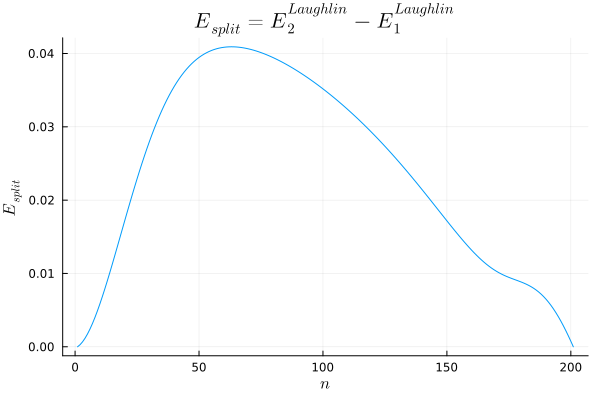

In [20]:
plot(E_Split_List, title=L"E_{split} = E_2^{Laughlin} - E_1^{Laughlin}", xlabel=L"n", ylabel=L"E_{split}", legend=false)

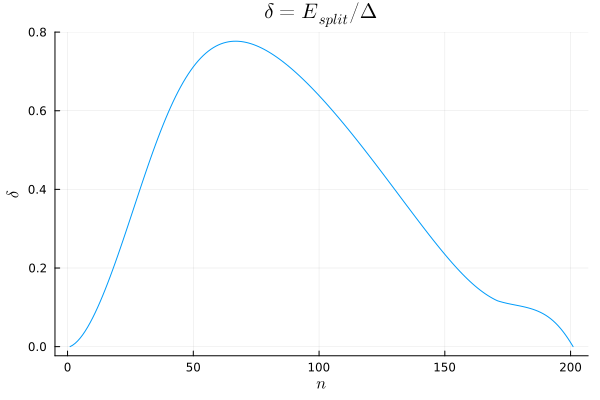

In [18]:
plot(δ_List, title=L"δ = E_{split} / Δ", xlabel=L"n", ylabel=L"δ", legend=false)

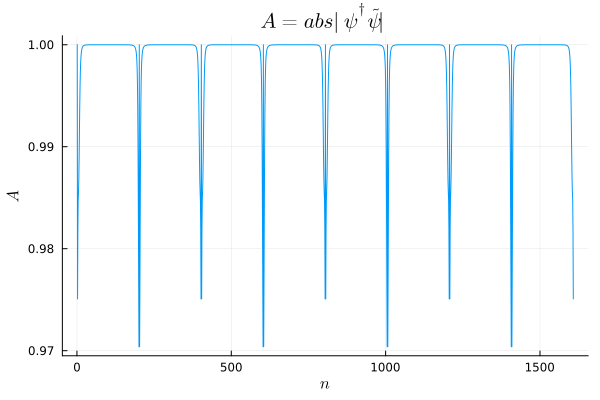

In [74]:
plot(abs.(det.(A_list)), title=L"A = abs|ψ^{†} \tilde{\psi}|", xlabel=L"n", ylabel=L"A", legend=false)

In [17]:
(ψ'*ψ_first)'-(ψ'*ψ_first)

2×2 Matrix{ComplexF64}:
      0.0-0.533582im  -0.180263+0.23371im
 0.180263+0.23371im         0.0+0.533582im

In [16]:
BerryE, BerryU = eigen(ψ'*ψ_first)
BerryE

2-element Vector{ComplexF64}:
 -0.9523884627409801 + 0.30488721855445666im
 -0.9523884627409469 - 0.3048872185545599im

In [75]:
log.(BerryE)./(im*2*pi)

2-element Vector{ComplexF64}:
  0.4506906143456779 - 2.098282602354403e-17im
 -0.4506906143456606 - 0.0im